# Regression model
## Exploratory Phase

In [1]:
data <- read.csv(file.path("..", "data", "training_data.csv"))
data <- na.omit(data)
str(data)

'data.frame':	708 obs. of  4872 variables:
 $ Intensity             : Factor w/ 2 levels "high","low": 2 1 1 1 2 1 2 2 2 2 ...
 $ VALENCE.PLEASANTNESS  : int  45 49 56 7 51 21 56 52 53 1 ...
 $ SWEETORSOUR           : logi  FALSE TRUE TRUE FALSE FALSE FALSE ...
 $ complexity.from.pubmed: num  302 72.6 259 56.6 84.7 160 116 25 355 68.4 ...
 $ MW                    : num  208.3 122.2 242.3 88.1 136.2 ...
 $ AMW                   : num  5.95 6.43 7.57 6.29 6.19 ...
 $ Sv                    : num  19.7 11.35 20.83 7.54 12.88 ...
 $ Se                    : num  34.5 18.7 32.2 14.2 21.6 ...
 $ Sp                    : num  21.52 12.26 21.69 7.96 14.02 ...
 $ Si                    : num  39.6 21.3 35.5 16.1 24.7 ...
 $ Mv                    : num  0.563 0.597 0.651 0.538 0.585 0.588 0.667 0.49 0.609 0.619 ...
 $ Me                    : num  0.985 0.987 1.005 1.014 0.983 ...
 $ Mp                    : num  0.615 0.645 0.678 0.568 0.637 0.633 0.707 0.571 0.618 0.703 ...
 $ Mi                    

There are 708 observations (n) of 4872 variables (p) (numerical and categorical) in the data set.

In [2]:
min(data$VALENCE.PLEASANTNESS)
max(data$VALENCE.PLEASANTNESS)

[1] 0

[1] 98

The pleasantness seems to correspond to a grade from 0 to 100.

We will rename the response and transform the 'Intensity' predictor to numerical values for simplicity. We do not need 'SWEETORSOUR' as it is the response we do not want to predict here.

In [3]:
data$PL <- data$VALENCE.PLEASANTNESS
data$VALENCE.PLEASANTNESS <- NULL
data$Intensity <- as.numeric(data$Intensity)
data$SWEETORSOUR <- NULL

We plot an histogram to see how the response is distributed.

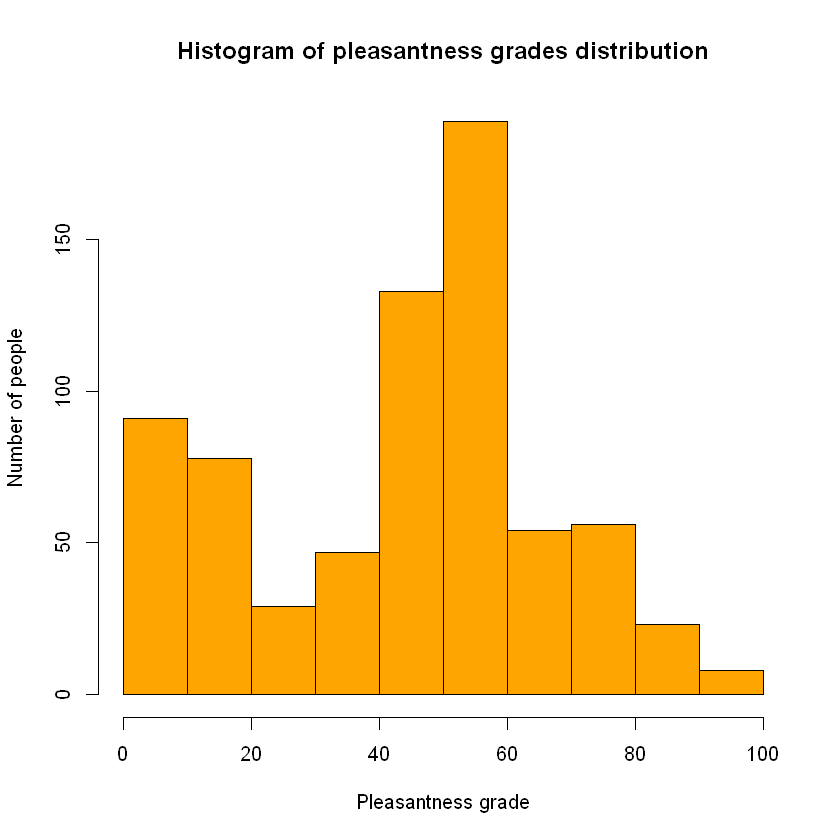

In [4]:
hist(data$PL, main = 'Histogram of pleasantness grades distribution',xlab = 'Pleasantness grade', ylab = 'Number of people', col = 'orange')

The response seems to respect gaussian distribution with the exception that an important proportion of the population systematically gives bad grades for some underlying reason. This might be linked to genetic markers.

We also want to keep only predictors that have different values throughout the observations (only these are useful to predict), so we check for existence of variance.

In [5]:
cols = names(data[, sapply(data, function(v) var(v) != 0)])
data <- data[,cols]
dim(data)

[1]  708 3029

We can see that among the 4872 initial variables, there are only 3029 left, meaning 3028 predictors to estimate the response.

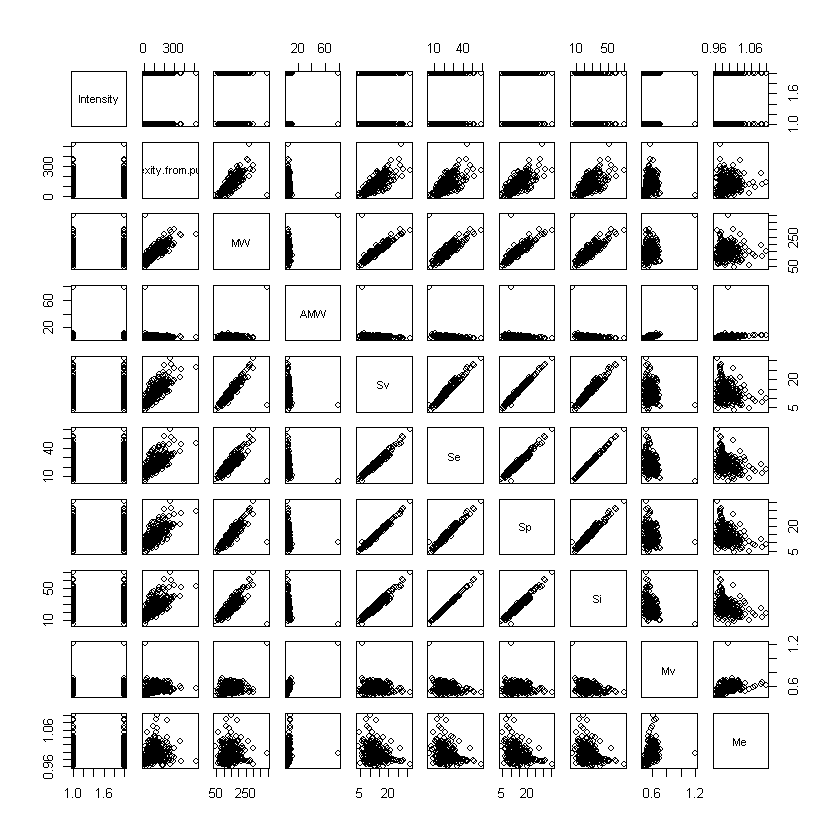

In [6]:
pairs(data[,1:10])

By comparing some data, we can already notice some linear dependencies. 